In [2]:
call_deal = [675.00, 610.00, 525.00, 448.00, 395.00, 345.00, 289.00, 238.00, 194.00, 153.00, 120.00, 92.00, 69.00, 
52.00, 39.50, 28.00, 20.50, 16.00, 12.00, 9.80, 8.50]

put_deal = [139.00, 163.00, 189.00, 221.00, 255.00, 291.00, 338.00, 388.00, 439.00, 505.00, 565.00, 640.00, 730.00,
800.00, 900.00, 995.00, 1090.00, 1180.00, 1290, 1380, 1470]

In [3]:
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

def bscall(S, K, T, r, vol):   # vol:波動率
    d1 = (math.log(S/K) + (r+vol*vol/2)*T)/(vol*math.sqrt(T))
    d2 = d1 - vol*math.sqrt(T)
    c = S*norm.cdf(d1) - K*math.exp(-r*T)*norm.cdf(d2)
    return c

def bsput(S, K, T, r, vol):
    d1 = (math.log(S/K) + (r+vol*vol/2)*T)/(vol*math.sqrt(T))
    d2 = d1 - vol*math.sqrt(T)
    p = K*math.exp(-r*T)*(1-norm.cdf(d2)) - S*(1-norm.cdf(d1))
    return p

In [4]:
def find_vol_call(S, K, T, r, call): # bisectionBLS
    left = 1e-8
    right = 1
    threshold = 1e-5
    while right - left >= threshold:
        middle = (left+right)/2
        if (bscall(S, K, T, r, left)-call)*(bscall(S, K, T, r, middle)-call)<0:
            right = middle
        else:
            left = middle
    return (left+right)/2

def find_vol_put(S, K, T, r, put): # bisectionBLS
    left = 1e-8
    right = 1
    threshold = 1e-5
    while right - left >= threshold:
        middle = (left+right)/2
        if (bsput(S, K, T, r, left)-put)*(bsput(S, K, T, r, middle)-put)<0:
            right = middle
        else:
            left = middle
    return (left+right)/2

find_vol_call(13552.46, 13100, 22, 0.016, 610)

0.9999961853027726

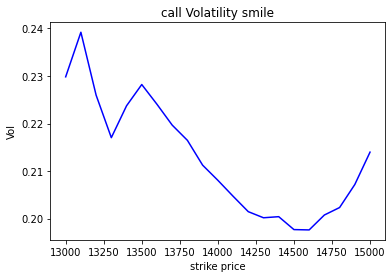

In [7]:
#r = 0.016 # Taiwan
r = 0.037  # US
T = 22/365       # 9/28-10/19
K = 13000
S = 13552.46
call_vol_list = []
K_list = list(range(13000, 15100, 100))
for call, K in zip(call_deal, K_list):
    call_vol_list.append(find_vol_call(S, K, T, r, call))

plt.plot(K_list, call_vol_list, 'b-')
plt.title('call Volatility smile')
plt.xlabel('strike price')
plt.ylabel('Vol')
plt.show()

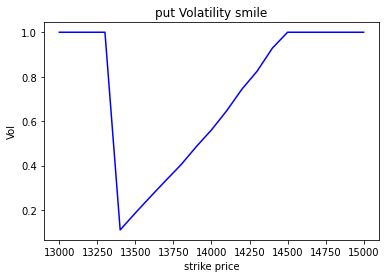

In [9]:
put_vol_list = []
for put, K in zip(put_deal, K_list):
    put_vol_list.append(find_vol_call(S, K, T, r, put))
    
plt.plot(K_list, put_vol_list, 'b-')
plt.title('put Volatility smile')
plt.xlabel('strike price')
plt.ylabel('Vol')
plt.show()